In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import math
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/dataset_train.csv')

In [3]:
df.head()

Index Hogwarts House First Name  Last Name    Birthday Best Hand  \
0      0      Ravenclaw     Tamara        Hsu  2000-03-30      Left   
1      1      Slytherin      Erich    Paredes  1999-10-14     Right   
2      2      Ravenclaw   Stephany      Braun  1999-11-03      Left   
3      3     Gryffindor      Vesta  Mcmichael  2000-08-19      Left   
4      4     Gryffindor     Gaston      Gibbs  1998-09-27      Left   

   Arithmancy   Astronomy  Herbology  Defense Against the Dark Arts  \
0     58384.0 -487.886086   5.727180                       4.878861   
1     67239.0 -552.060507  -5.987446                       5.520605   
2     23702.0 -366.076117   7.725017                       3.660761   
3     32667.0  697.742809  -6.497214                      -6.977428   
4     60158.0  436.775204  -7.820623                            NaN   

   Divination  Muggle Studies  Ancient Runes  History of Magic  \
0       4.722      272.035831     532.484226          5.231058   
1      -5.612     -487.340557     367.760303          4.107170   
2       6.140      664.893521     602.585284          3.555579   
3       4.026     -537.001128     523.982133         -4.809637   
4       2.236     -444.262537     599.324514         -3.444377   

   Transfiguration   Potions  Care of Magical Creatures     Charms  Flying  
0      1039.788281  3.790369                   0.715939 -232.79405  -26.89  
1      1058.944592  7.248742                   0.091674 -252.18425 -113.45  
2      1088.088348  8.728531                  -0.515327 -227.34265   30.42  
3       920.391449  0.821911                  -0.014040 -256.84675  200.64  
4       937.434724  4.311066                  -0.264070 -256.38730  157.98

In [75]:
df.describe()

Index     Arithmancy    Astronomy    Herbology  \
count  1600.00000    1566.000000  1568.000000  1567.000000   
mean    799.50000   49634.570243    39.797131     1.141020   
std     462.02453   16679.806036   520.298268     5.219682   
min       0.00000  -24370.000000  -966.740546   -10.295663   
25%     399.75000   38511.500000  -489.551387    -4.308182   
50%     799.50000   49013.500000   260.289446     3.469012   
75%    1199.25000   60811.250000   524.771949     5.419183   
max    1599.00000  104956.000000  1016.211940    11.612895   

       Defense Against the Dark Arts   Divination  Muggle Studies  \
count                    1569.000000  1561.000000     1565.000000   
mean                       -0.387863     3.153910     -224.589915   
std                         5.212794     4.155301      486.344840   
min                       -10.162119    -8.727000    -1086.496835   
25%                        -5.259095     3.099000     -577.580096   
50%                        -2.589342     4.624000     -419.164294   
75%                         4.904680     5.667000      254.994857   
max                         9.667405    10.032000     1092.388611   

       Ancient Runes  History of Magic  Transfiguration      Potions  \
count    1565.000000       1557.000000      1566.000000  1570.000000   
mean      495.747970          2.963095      1030.096946     5.950373   
std       106.285165          4.425775        44.125116     3.147854   
min       283.869609         -8.858993       906.627320    -4.697484   
25%       397.511047          2.218653      1026.209993     3.646785   
50%       463.918305          4.378176      1045.506996     5.874837   
75%       597.492230          5.825242      1058.436410     8.248173   
max       745.396220         11.889713      1098.958201    13.536762   

       Care of Magical Creatures       Charms       Flying  
count                1560.000000  1600.000000  1600.000000  
mean                   -0.053427  -243.374409    21.958012  
std                     0.971457     8.783640    97.631602  
min                    -3.313676  -261.048920  -181.470000  
25%                    -0.671606  -250.652600   -41.870000  
50%                    -0.044811  -244.867765    -2.515000  
75%                     0.589919  -232.552305    50.560000  
max                     3.056546  -225.428140   279.070000

In [5]:
df_types = df.select_dtypes(include=['float64', 'int64'])

In [6]:
names = df_types.keys()

In [7]:
names

Index(['Index', 'Hogwarts House', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

In [57]:
def stat(arr): 
    
    def percentile(array, percent):
        k = (len(array) - 1) * percent
        f = math.floor(k)
        c = math.ceil(k)
        if f == c:
            return array[int(k)]
        d0 = array[int(f)] * (c - k)
        d1 = array[int(c)] * (k - f)
        return d0 + d1
        
    count = 0
    mini = float('inf')
    maxi = -float('inf')
    mean = 0
    values = []
    for x in arr:
        if(not np.isnan(x)):
            count += 1
            mean += x
            values.append(x)
        if(maxi < x):
            maxi = x
        if(mini > x):
            mini = x
    if(count == 0):
        return [0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    mean /= count
    
    std = 0
    for x in values:
        std += (x - mean) ** 2
    std = (std / (count - 1)) ** 0.5
    values = sorted(values)
    per_25 = percentile(values, 0.25)
    per_50 = percentile(values, 0.5)
    per_75 = percentile(values, 0.75)
    dic = dict()
    return [count, mean, std, mini, per_25, per_50, per_75, maxi]

In [58]:
x = list(map(lambda name: att(df_types[name]), names))

In [67]:
result = pd.DataFrame(x, columns=['count', 'means', 'std', 'min', '25%', '50%', '75%', 'max'], index=names).T
result

Index  Hogwarts House    Arithmancy   Astronomy   Herbology  \
count  400.000000             0.0    387.000000  387.000000  389.000000   
means  199.500000             NaN  50088.971576   48.155326    1.385517   
std    115.614301             NaN  15472.748364  512.537781    5.055295   
min      0.000000             NaN   4536.000000 -802.725180   -9.687662   
25%     99.750000             NaN  40167.500000 -483.719690   -4.183731   
50%    199.500000             NaN  49238.000000  292.108738    3.630490   
75%    299.250000             NaN  60157.000000  508.713093    5.405685   
max    399.000000             NaN  99744.000000  870.063498    9.678462   

       Defense Against the Dark Arts  Divination  Muggle Studies  \
count                     392.000000  394.000000      390.000000   
means                      -0.537843    3.411071     -220.169594   
std                         5.118762    3.891192      497.668782   
min                        -8.700635   -8.183000    -1041.323658   
25%                        -5.209348    3.528750     -580.049325   
50%                        -2.915654    4.703000     -407.549022   
75%                         4.785055    5.571000      221.387925   
max                         8.027252    8.604000      939.317135   

       Ancient Runes  History of Magic  Transfiguration     Potions  \
count     392.000000        389.000000       389.000000  390.000000   
means     495.937543          2.829816      1030.885777    5.776860   
std       101.657418          4.317209        45.346899    3.217625   
min       319.360250         -7.189090       906.932050   -1.162060   
25%       400.719831          2.227669      1028.499974    3.230372   
50%       484.102477          4.290164      1047.648405    5.731330   
75%       591.372101          5.662488      1060.367924    8.136907   
max       667.674165         10.366995      1099.966073   13.390013   

       Care of Magical Creatures      Charms      Flying  
count                 392.000000  400.000000  400.000000  
means                   0.022985 -243.181109   23.367450  
std                     1.019005    8.727190   95.185944  
min                    -2.871119 -259.866780 -143.520000  
25%                    -0.646285 -250.150987  -38.475000  
50%                     0.059416 -244.758710   -2.555000  
75%                     0.711248 -232.798160   45.332500  
max                     3.205525 -226.003820  282.430000

Index  Hogwarts House    Arithmancy   Astronomy   Herbology  \
count  400.000000             0.0    387.000000  387.000000  389.000000   
mean   199.500000             NaN  50088.971576   48.155326    1.385517   
std    115.614301             NaN  15472.748364  512.537781    5.055295   
min      0.000000             NaN   4536.000000 -802.725180   -9.687662   
25%     99.750000             NaN  40167.500000 -483.719690   -4.183731   
50%    199.500000             NaN  49238.000000  292.108738    3.630490   
75%    299.250000             NaN  60157.000000  508.713093    5.405685   
max    399.000000             NaN  99744.000000  870.063498    9.678462   

       Defense Against the Dark Arts  Divination  Muggle Studies  \
count                     392.000000  394.000000      390.000000   
mean                       -0.537843    3.411071     -220.169594   
std                         5.118762    3.891192      497.668782   
min                        -8.700635   -8.183000    -1041.323658   
25%                        -5.209348    3.528750     -580.049325   
50%                        -2.915654    4.703000     -407.549022   
75%                         4.785055    5.571000      221.387925   
max                         8.027252    8.604000      939.317135   

       Ancient Runes  History of Magic  Transfiguration     Potions  \
count     392.000000        389.000000       389.000000  390.000000   
mean      495.937543          2.829816      1030.885777    5.776860   
std       101.657418          4.317209        45.346899    3.217625   
min       319.360250         -7.189090       906.932050   -1.162060   
25%       400.719831          2.227669      1028.499974    3.230372   
50%       484.102477          4.290164      1047.648405    5.731330   
75%       591.372101          5.662488      1060.367924    8.136907   
max       667.674165         10.366995      1099.966073   13.390013   

       Care of Magical Creatures      Charms      Flying  
count                 392.000000  400.000000  400.000000  
mean                    0.022985 -243.181109   23.367450  
std                     1.019005    8.727190   95.185944  
min                    -2.871119 -259.866780 -143.520000  
25%                    -0.646285 -250.150987  -38.475000  
50%                     0.059416 -244.758710   -2.555000  
75%                     0.711248 -232.798160   45.332500  
max                     3.205525 -226.003820  282.430000

In [168]:
targert_col in df.keys()

True

### Hist

In [177]:
targert_col = 'Hogwarts House'

In [178]:
df.dropna(inplace=True)

In [179]:
Y = df[targert_col]


In [180]:
df_number = df.select_dtypes(include=['float64', 'int64'])

In [181]:
df_normal = (df_number - df_number.mean()) / df_number.std()

In [182]:
df_normal.describe()

Index    Arithmancy     Astronomy     Herbology  \
count  1.251000e+03  1.251000e+03  1.251000e+03  1.251000e+03   
mean   9.087677e-17 -4.827828e-17  1.135960e-17  4.259849e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.723852e+00 -4.420134e+00 -1.944956e+00 -2.198893e+00   
25%   -8.673515e-01 -6.749737e-01 -1.020834e+00 -1.041848e+00   
50%    4.308727e-03 -3.952384e-02  4.330490e-01  4.474265e-01   
75%    8.662237e-01  6.790620e-01  9.249894e-01  8.183362e-01   
max    1.738967e+00  3.323217e+00  1.861489e+00  1.743646e+00   

       Defense Against the Dark Arts    Divination  Muggle Studies  \
count                   1.251000e+03  1.251000e+03    1.251000e+03   
mean                   -2.839899e-18 -1.192758e-16   -2.271919e-17   
std                     1.000000e+00  1.000000e+00    1.000000e+00   
min                    -1.861489e+00 -2.904611e+00   -1.692952e+00   
25%                    -9.249894e-01 -2.270268e-02   -7.238675e-01   
50%                    -4.330490e-01  3.422944e-01   -4.046729e-01   
75%                     1.020834e+00  6.113293e-01    1.004252e+00   
max                     1.944956e+00  1.658522e+00    2.712022e+00   

       Ancient Runes  History of Magic  Transfiguration       Potions  \
count   1.251000e+03      1.251000e+03     1.251000e+03  1.251000e+03   
mean   -2.314518e-16      4.401843e-17    -1.713879e-15 -8.519697e-18   
std     1.000000e+00      1.000000e+00     1.000000e+00  1.000000e+00   
min    -1.990260e+00     -2.559974e+00    -2.801898e+00 -3.088073e+00   
25%    -9.356281e-01     -1.677520e-01    -9.599011e-02 -7.338635e-01   
50%    -2.991629e-01      3.195085e-01     3.550879e-01 -2.988755e-02   
75%     9.489722e-01      6.540943e-01     6.471708e-01  7.236387e-01   
max     2.334770e+00      1.999370e+00     1.468702e+00  2.441407e+00   

       Care of Magical Creatures        Charms        Flying  
count               1.251000e+03  1.251000e+03  1.251000e+03  
mean               -1.987929e-17 -2.726303e-15  4.259849e-18  
std                 1.000000e+00  1.000000e+00  1.000000e+00  
min                -3.340742e+00 -2.016198e+00 -2.092772e+00  
25%                -6.478488e-01 -8.259201e-01 -6.464528e-01  
50%                -8.228137e-04 -1.664801e-01 -2.560381e-01  
75%                 6.579105e-01  1.228373e+00  3.019384e-01  
max                 3.208629e+00  2.036036e+00  2.618392e+00

In [183]:
target_cls = list(set(Y))

In [184]:
name_courses = list(df_normal.keys())

In [185]:
name_courses.remove('Index')

In [186]:
size_plot = round((len(name_courses)) ** 0.5)

In [191]:
df_normal[targert_col] = Y

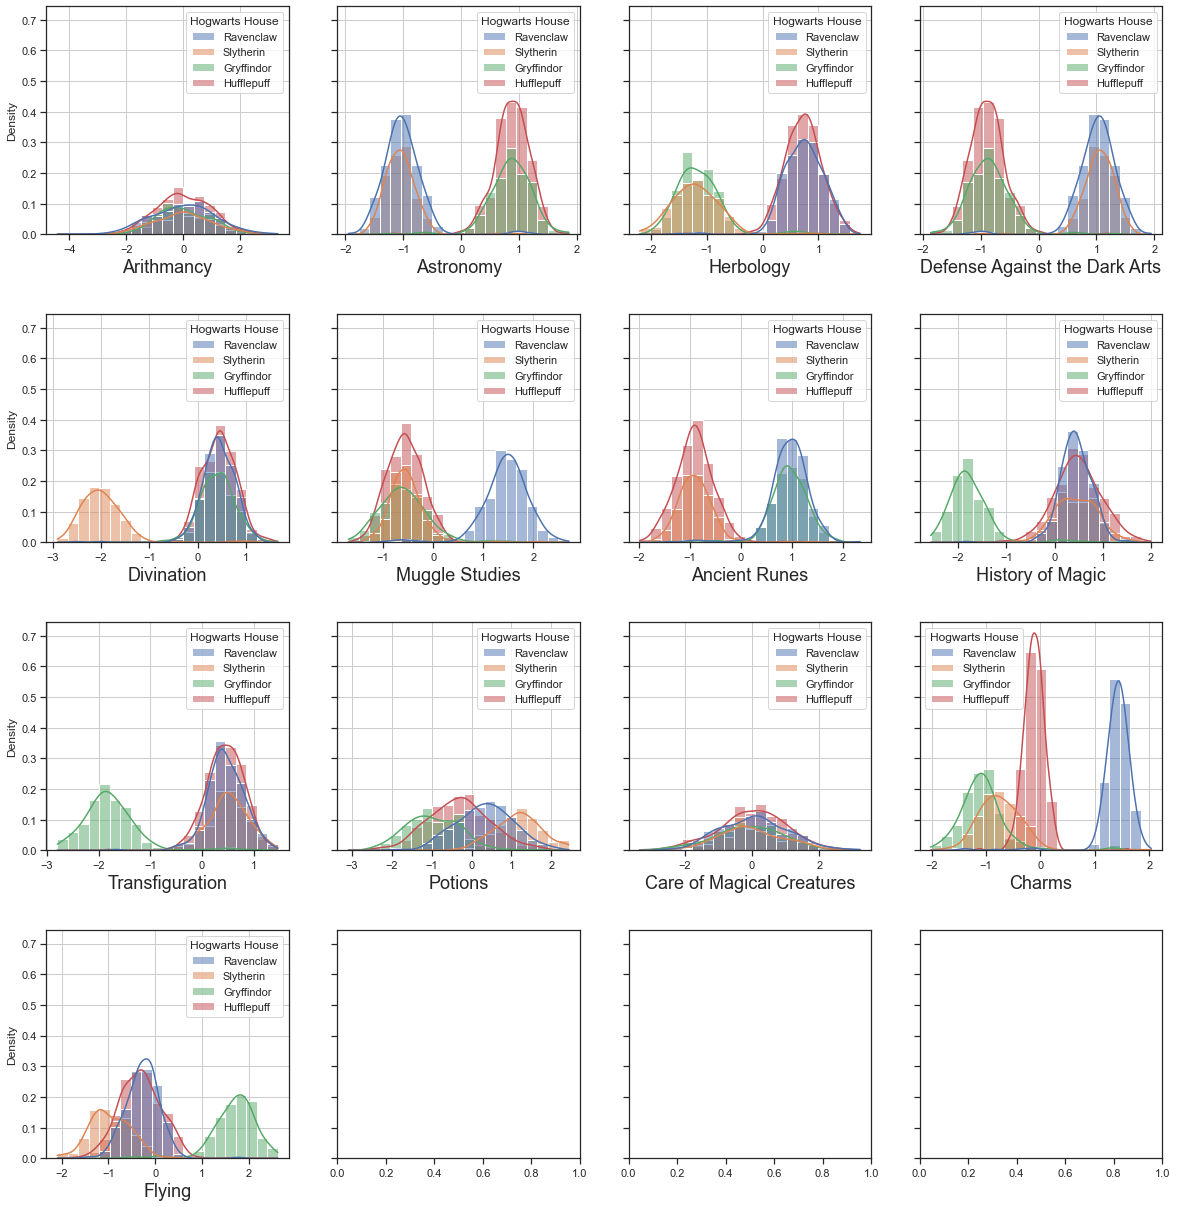

In [194]:
fig, axes = plt.subplots(nrows=size_plot, ncols=size_plot, figsize=(20, 20), sharey=True)
plots = axes.flatten()
i = 0
for name in name_courses: 
    if(name != targert_col):
        sns.histplot(ax=plots[i], data=df_normal, x=name, hue=targert_col, kde=True, common_norm=True, stat="density", bins=21)
        plots[i].set_xlabel(name, fontsize=18)
        plots[i].grid()
        i += 1
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [203]:
norm_course = 'Care of Magical Creatures'

<AxesSubplot:xlabel='Care of Magical Creatures', ylabel='Density'>

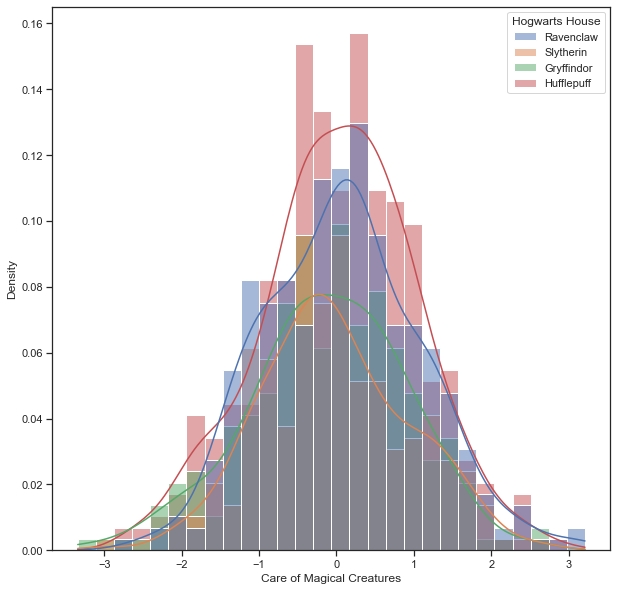

In [206]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(data=df_normal, x=norm_course, hue=targert_col, kde=True, common_norm=True, stat="density")

### Scatter plot

In [14]:
df.keys()

Index(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday',
       'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology',
       'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
       'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
       'Care of Magical Creatures', 'Charms', 'Flying'],
      dtype='object')

In [11]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

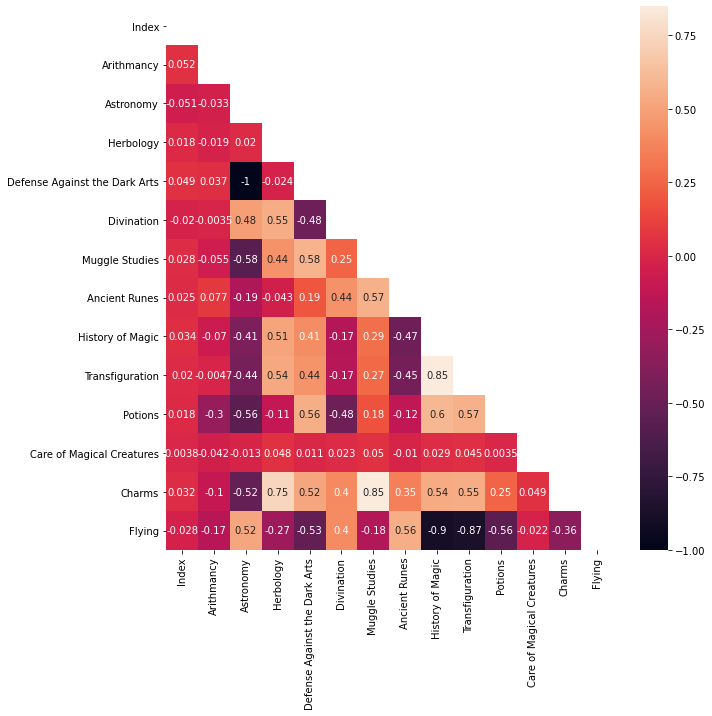

In [13]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True)

<AxesSubplot:xlabel='Astronomy', ylabel='Defense Against the Dark Arts'>

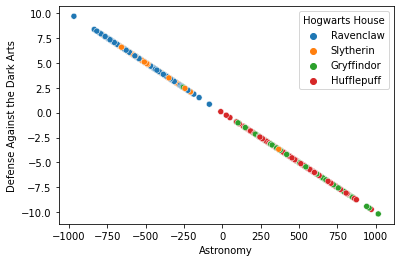

In [18]:
feat1 = 'Astronomy'
feat2 = 'Defense Against the Dark Arts'
target_col = 'Hogwarts House'
sns.scatterplot(data=df, x=feat1, y=feat2, hue=target_col)

### Pair plot

<Figure size 720x720 with 0 Axes>

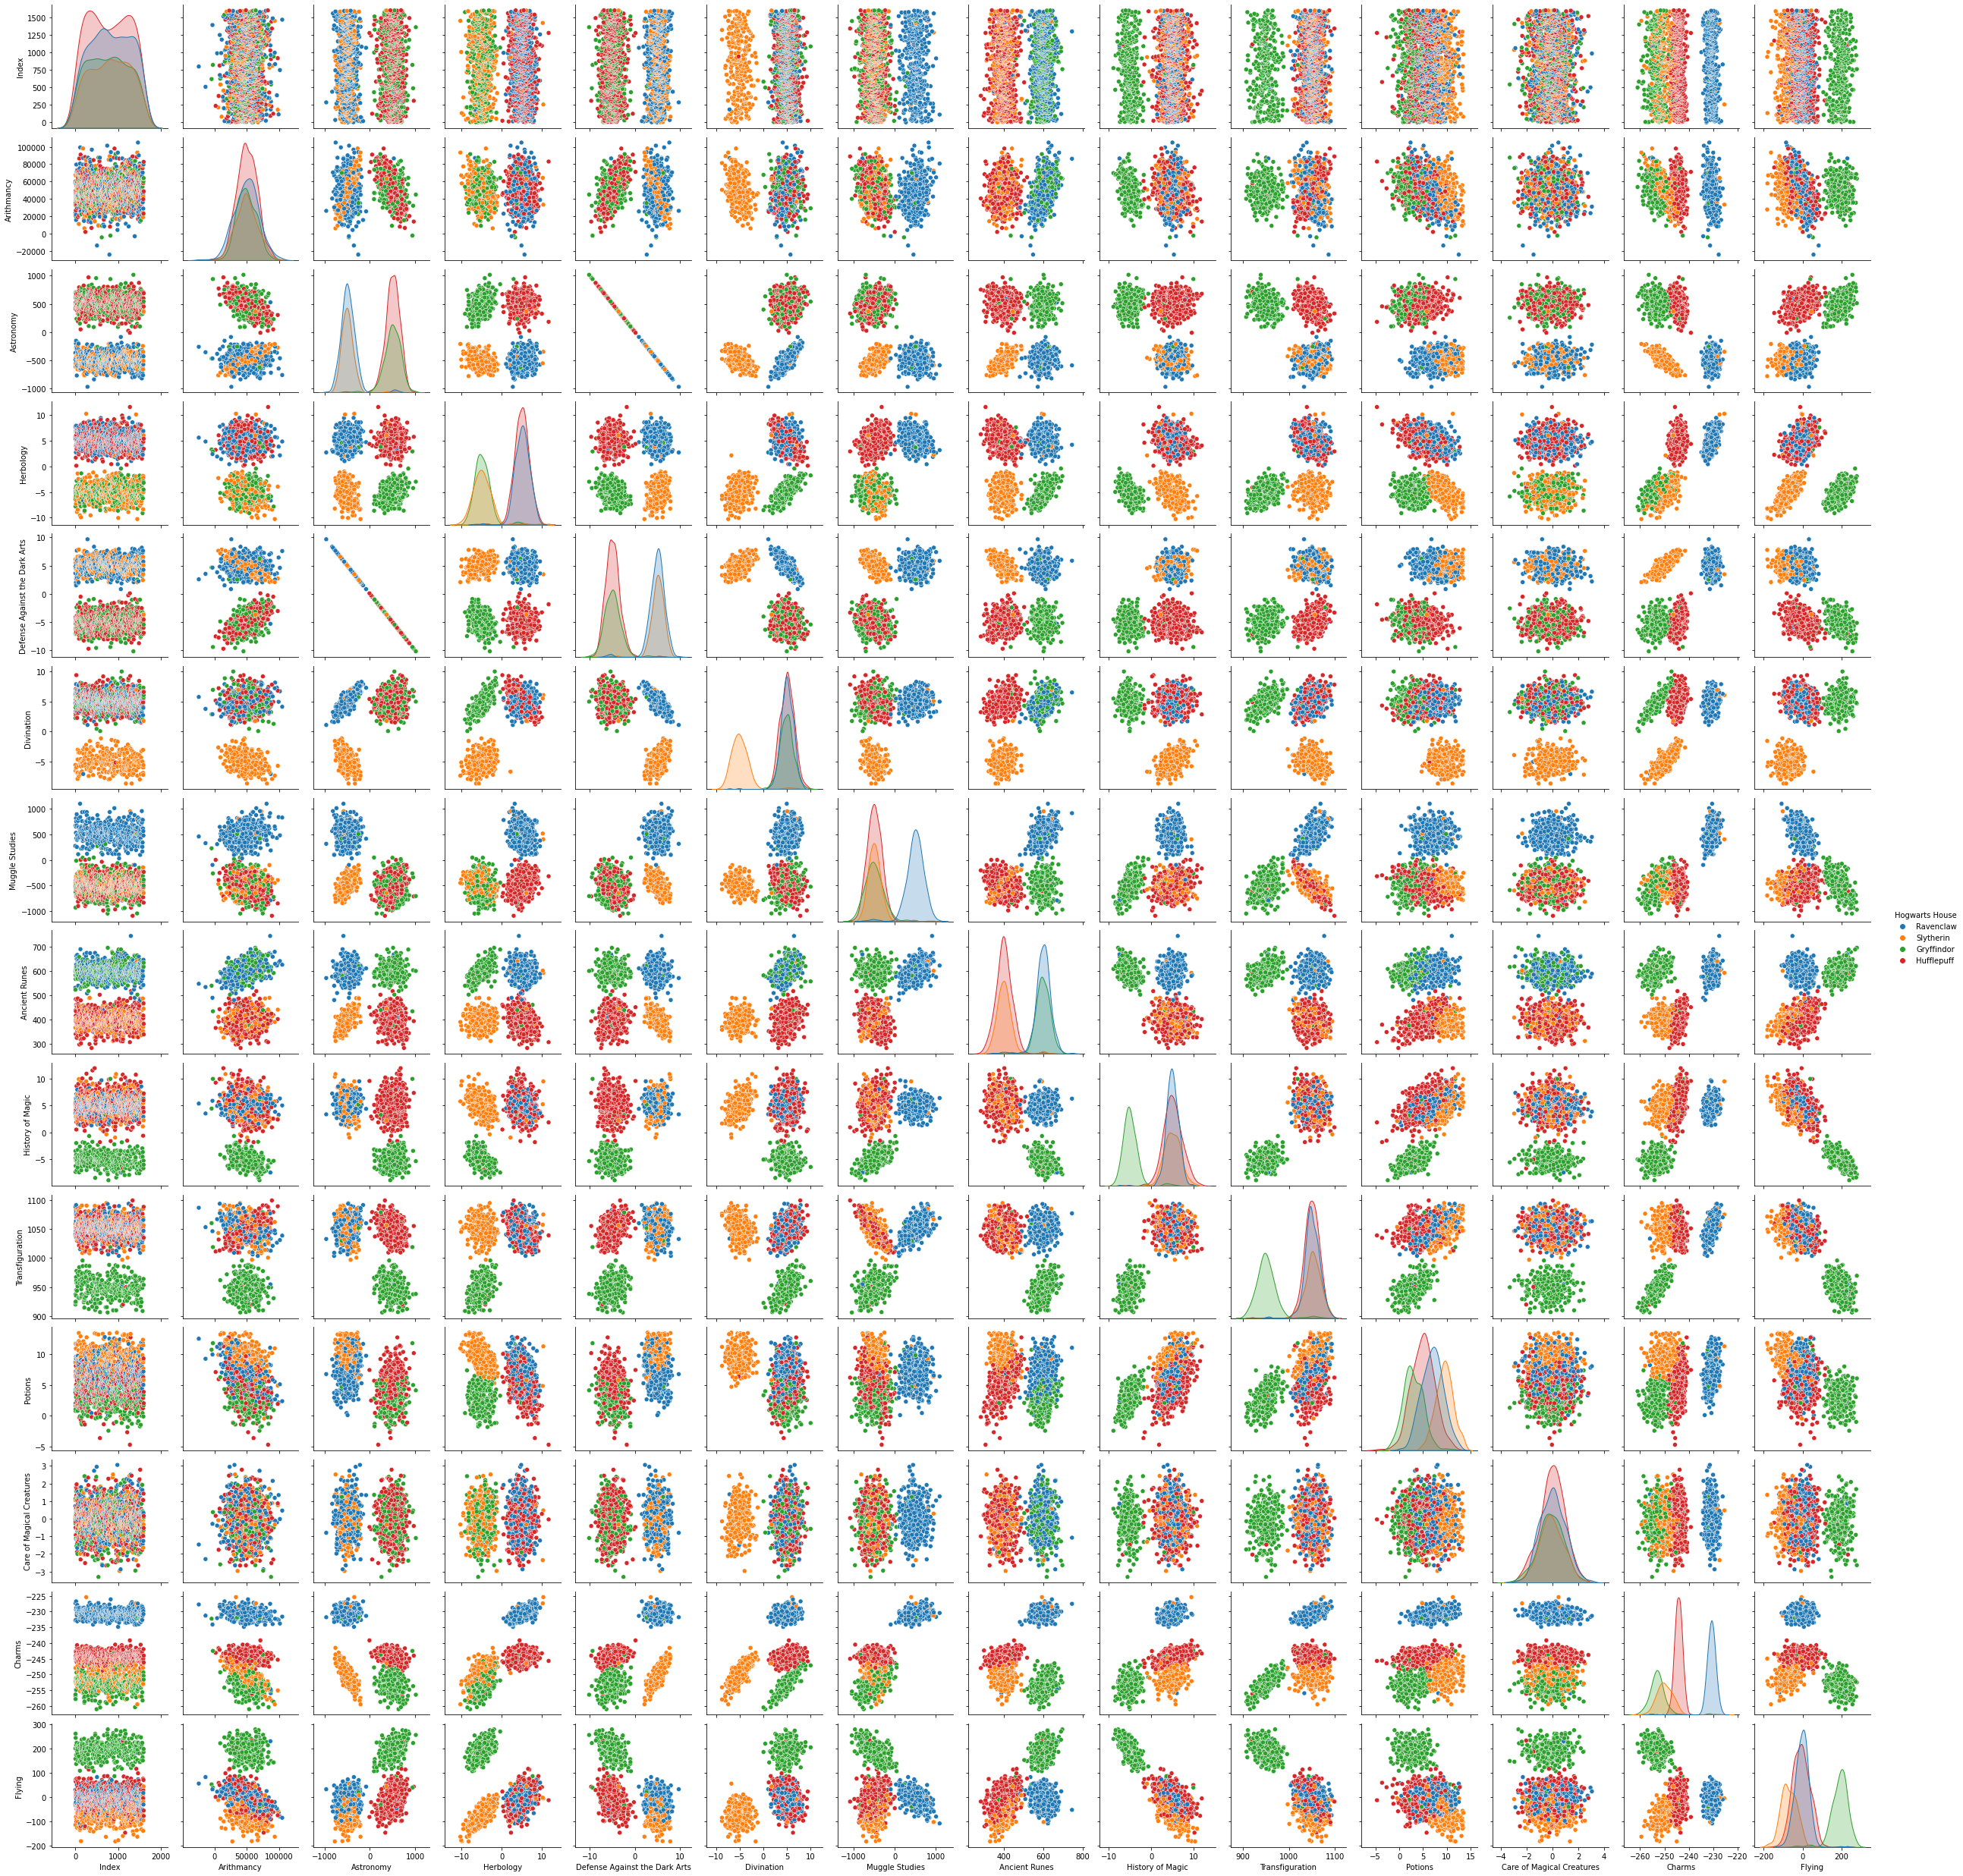

In [20]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue=target_col)